<a href="https://colab.research.google.com/github/ELMehdiNaor/TensorFlow-Developer-Certificate-in-2022-Zero-to-Mastery/blob/main/Exercises/01_Neural_network_regression_with_TensorFlow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠 Neural Network regression with TensorFlow exercises 

1- Create your own dataset and also build and fit a model to it

2- Try building a neural network with 4 Dense layers and fitting it to your own regression Dataset and see how does it perform

3- Try and improve the results we got on the insurance dataset, some things you might want to try include: 

  - Building a larger model (how does one with 4  Dense layers do) 

  - Increasing the number of units in each layer

  - What happens if you train for longer (say 300epochs instead of 200)

  - Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x? 

4- Import the **Boston pricing dataset** from TensorFlow using `tf.keras.datasets` and model it.

## 1-Create your own regression dataset and also build and fit a model to it 

In [ ]:
# Import the necessary packages/libraries: 
import numpy as np 
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Let's create our own dataset: 
# Features:
X = tf.range(-150,150,5)
len(X), X.shape, X.dtype, X.ndim

(60, TensorShape([60]), tf.int32, 1)

In [ ]:
# Labels: 
y = X + 5 
len(y), y.shape, y.dtype, y.ndim

(60, TensorShape([60]), tf.int32, 1)

<function matplotlib.pyplot.legend>

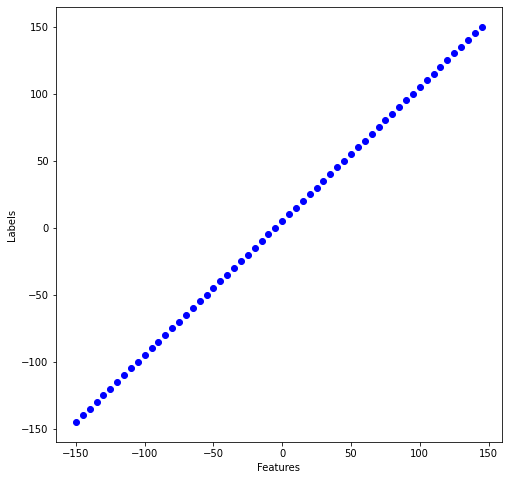

In [ ]:
# Let's visualize the data: 
plt.figure(figsize=(8,8))
plt.scatter(X,y, c="b", label="Data Set")
plt.xlabel("Features")
plt.ylabel("Labels")
plt.legend

### The Three Sets: 

-**Training Set:** the model learns from this data, which is typically 70-80% of the total data you have available 

-**Testing Set:** the model gets evaluated on this data to test what it had learned, this set is typically 10-15% of the total data available

-**Validation Set:** the model gets tuned on this data, which is typically 10-15% of the data available

In [ ]:
# Check the length of how many samples we have: 
len(X)

60

In [ ]:
# Split the data intro training and testing sets: 
# Training Set: 
X_train = X[:48] # first 48 are training samples (80% of the data)
y_train = y[:48] # 

# Testing Set: 
X_test = X[48:] # Last 12 are testing samples (20% of the data)
y_test = y[48:]

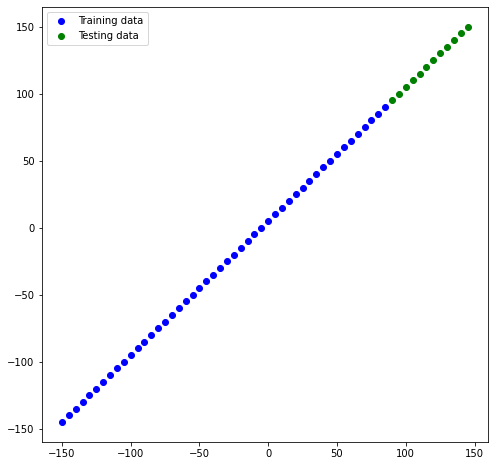

In [ ]:
# Visualizing the data: 
# Create a plot figure: 
plt.figure(figsize=(8,8))
# Plot the training data in blue: 
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot the testing data in green: 
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend: 
plt.legend()

Text(0, 0.5, 'losses')

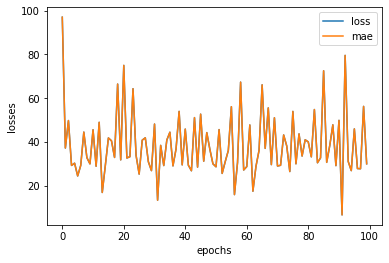

In [ ]:
# Let's build a neural network for our data:
# Step.1 Create the model: 
model1 = tf.keras.Sequential([
         tf.keras.layers.Dense(10, name="layer1"),
         tf.keras.layers.Dense(1, name="layer2")
])

# Step.2 Compile the model: 
model1.compile(loss = tf.keras.losses.mae, 
               optimizer = tf.keras.optimizers.SGD(),
               metrics=["mae"])

# Step3. Fit the model: 
history = model1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)

# Show the history of the model: 
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("losses")

In [ ]:
# Summary of the model: 
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                20        
                                                                 
 layer2 (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


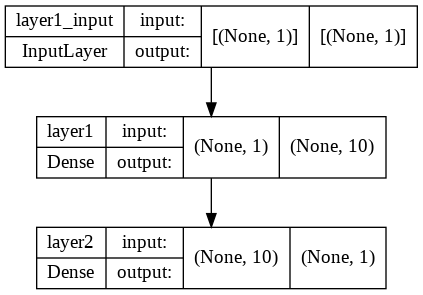

In [ ]:
# Plot the model: 
from tensorflow.keras.utils import plot_model
plot_model(model=model1, show_shapes=True)

In [ ]:
# Let's make some prediction with our model and visualize them: 
y_preds = model1.predict(X_test)
# 
len(y_preds), y_preds.shape, y_preds.dtype, y_preds.ndim

(12, (12, 1), dtype('float32'), 2)

In [ ]:
# Let's create a plotting function to visualize our data (Training, Testing, Prediction): 
def plot_predictions(train_data= X_train, train_labels = y_train, 
                     test_data = X_test, test_labels = y_test, 
                     predictions = y_preds):
 """ 
 This function plots training data, test data and compares predictions to ground truth label
 """ 

 # Create a figure: ,
 plt.figure(figsize=(8,8))
 # Plot the training data in blue: 
 plt.scatter(train_data, train_labels, c="b", label="Training Data")
 # Plot the testing data in green: 
 plt.scatter(test_data, test_labels, c="g", label="Testing data")
 # Plot the predictions in red: 
 plt.scatter(test_data, predictions, c="r", label="Predictions")
 # Show legend: 
 plt.legend()

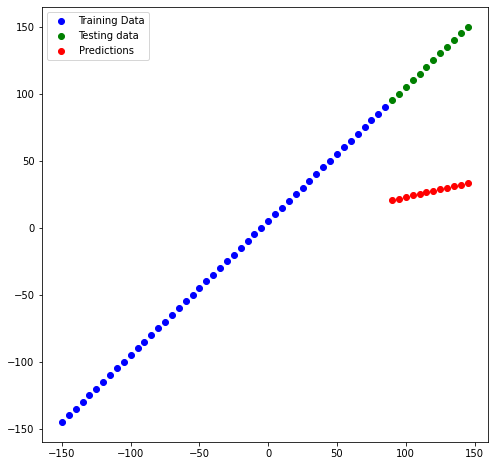

In [ ]:
# Plot the predictions:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics:

- **MAE** 

- **MSE** 

In [ ]:
# Evaluate the model on the test data: 
model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 95.6161 - mae: 95.6161


[95.61612701416016, 95.61612701416016]

In [ ]:
y_preds

array([[20.62626 ],
       [21.76401 ],
       [22.901756],
       [24.039503],
       [25.177252],
       [26.314999],
       [27.452747],
       [28.59049 ],
       [29.72824 ],
       [30.865986],
       [32.003735],
       [33.14148 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(12,), dtype=int32, numpy=
array([ 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150],
      dtype=int32)>

In [ ]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([20.62626 , 21.76401 , 22.901756, 24.039503, 25.177252, 26.314999,
       27.452747, 28.59049 , 29.72824 , 30.865986, 32.003735, 33.14148 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error: 
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=95.61613>

In [ ]:
# Calculate the mean squared error: 
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_preds))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9320.205>

In [ ]:
# Let's create another two functions "mae" and "mse": 
# MAE:
def mae (y_true, y_pred): 
  """ 
  This function calculates the mean absolute error
  """ 
  return tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_preds))

# MSE: 
def mse(y_true, y_pred):
  """ 
  This function calculates the mean squared error
  """
  return tf.metrics.mean_squared_error(y_true = y_test, y_pred=tf.squeeze(y_preds))


In [ ]:
# Quick test: 
mae_val = mae(y_test, y_preds)
mse_val = mse(y_test, y_preds)
#import numpy as np
#print("The mean absolute error is:", mae_val.numpy())
#print("The mean squared error is:", mse_val.numpy())
print("The mean absolute error is:", mae_val)
print("The mean squared error is:", mse_val)

The mean absolute error is: tf.Tensor(95.61613, shape=(), dtype=float32)
The mean squared error is: tf.Tensor(9320.205, shape=(), dtype=float32)


##2- Try building a neural network with 4 Dense layers and fitting it to your own regression Dataset and see how does it perform

### Steps in modelling with TensorFlow: 

1-**Create a model:** define the input and output layers, as well as the hidden layers of a deep learning model 

2-**Compile the model:** define the **Loss function**(in other words, the function will tell our model how wrong it is) and the **optimizer** (tells our model how to improve the patterns of it's learning) and **evaluation metrics** (what we can use to interpret the performance of our model)

3-**Fit the model:** letting the model try to find patterns between X and y (features and labels)

Text(0, 0.5, 'losses')

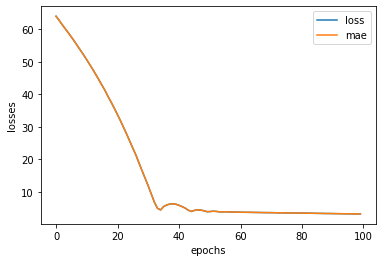

In [ ]:
# Set random for max reproducibility: 
tf.random.set_seed(42)

# Build a neural network for our data: 
# Step.1  create the model: 
model2 = tf.keras.Sequential([
         tf.keras.layers.Dense(10, name="layer1"),
         tf.keras.layers.Dense(5, name="layer2"),
         tf.keras.layers.Dense(5, name="layer3"),
         tf.keras.layers.Dense(1, name="layer4")                      
])

# Step.2 compile the model: 
model2.compile(loss = tf.keras.losses.mae, 
               optimizer = tf.keras.optimizers.Adam(), 
               metrics = ["mae"])

# Step.3 fit the model: 
history=model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose=0)

# Display the learning curve of the model: 
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("losses")

In [ ]:
# Summary of the model: 
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                20        
                                                                 
 layer2 (Dense)              (None, 5)                 55        
                                                                 
 layer3 (Dense)              (None, 5)                 30        
                                                                 
 layer4 (Dense)              (None, 1)                 6         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


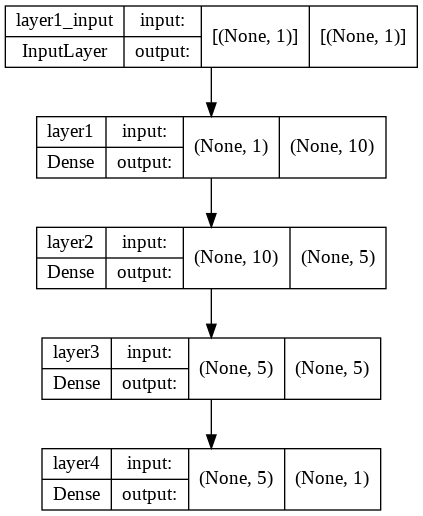

In [ ]:
# Plot the model: 
from tensorflow.keras.utils import plot_model 
plot_model(model=model2, show_shapes=True)

In [ ]:
# Let's make some predictions with our second model: 
y_preds2 = model2.predict(X_test)
len(y_preds2), y_preds.shape, y_preds2.ndim, y_preds2.dtype

(12, (12, 1), 2, dtype('float32'))

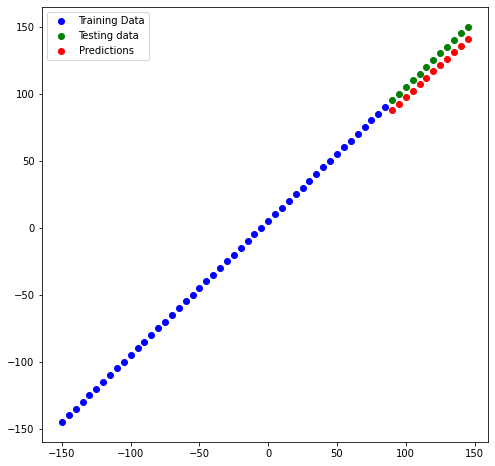

In [ ]:
# Let's visualite our data (Training, Testing, Predictions):
plot_predictions(predictions = y_preds2)

### # We can see that our model did well in predicting the outputs(well to be hones tried to find the right combination of parameters). If we want to improve the model, we can just altear the steps we took to create our model: 

1-**Creating the model:** here we night add more layers, increase the number of hidden units whitin each of the hidden layers, change the activation function of each layer. 

2-**Compile a model:** here we might change the opimization function or perhaps the learning rate of the optimization function 

3-**Fitting a model:** here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

##3- Try and improve the results we got on the insurance dataset, some things you might want to try include:

- Building a larger model (how does one with 4 layers go?)

- Increasing the number of units in each layer

- Lookup the documentation of Adam and find out what the first paramater is, what happens if you increase it by 10x? 

- What happens if you train for longer (say 300 epochs instead of 200)


### Building a larger model (how does one with 4 dense layers go?)

In [2]:
# Let's download the data: 
import pandas as pd 
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.shape

(1338, 7)

Our insurance data has 1338 and 7 columns

In [3]:
# Take a look at the data: 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We hame some categorical variables, let's convert those columns into numerical values using pandas.

In [4]:
# Turn categorical into numbers:
data_one_hot = pd.get_dummies(df)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
# Splitting the data to Features (X) and labels (y):
# Features:  
X = data_one_hot.drop("charges", axis=1)
# Labels: 
y = data_one_hot["charges"]

# Take look at the shape of X and y: 
X.shape, y.shape

((1338, 11), (1338,))

In [8]:
from sklearn.model_selection import train_test_split
# Splitting the data into Training and Testing: 
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Take a look at the shape of the training and testing sets:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [10]:
import tensorflow as tf
# Building the model with 4 dense layers and more units 
tf.random.set_seed(42)

# 1.Create the model: 
model = tf.keras.Sequential([
        tf.keras.layers.Dense(300, name="layer_1"), 
        tf.keras.layers.Dense(200, name="layer_2"),
        tf.keras.layers.Dense(100, name="layer_3"),
        tf.keras.layers.Dense(50,  name="layer_4"), 
        tf.keras.layers.Dense(1,   name="output_layer")                   
])

# 2.Compile the model: 
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(), 
              metrics=["mae"])

# 3.Fit the model: 
history_model = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 9ms/step - loss: 12907.1611 - mae: 12907.1611
Epoch 2/100
34/34 [==============================] - 0s 10ms/step - loss: 12179.2549 - mae: 12179.2549
Epoch 3/100
34/34 [==============================] - 0s 9ms/step - loss: 11955.6572 - mae: 11955.6572
Epoch 4/100
34/34 [==============================] - 0s 10ms/step - loss: 10579.5078 - mae: 10579.5078
Epoch 5/100
34/34 [==============================] - 0s 9ms/step - loss: 8336.3320 - mae: 8336.3320
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 8326.3887 - mae: 8326.3887
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 8313.6396 - mae: 8313.6396
Epoch 8/100
34/34 [==============================] - 0s 8ms/step - loss: 8342.3027 - mae: 8342.3027
Epoch 9/100
34/34 [==============================] - 0s 8ms/step - loss: 8307.5059 - mae: 8307.5059
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 8312.4336 - mae:

Text(0, 0.5, 'losses')

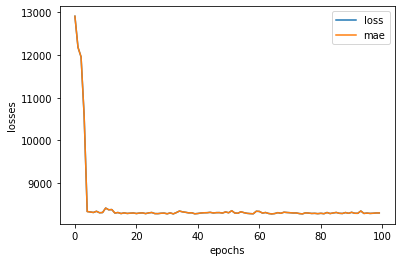

In [13]:
from matplotlib import pyplot as plt
# Take look at the history of the model: 
pd.DataFrame(history_model.history).plot()
plt.xlabel("epochs")
plt.ylabel("losses")

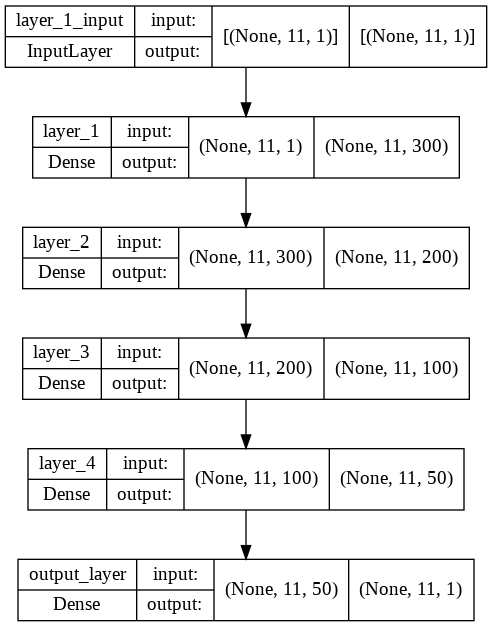

In [14]:
# Let's plot the model: 
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes = True)

### Look-up the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x? 

And running for 400 epochs

In [21]:
import tensorflow as tf
# Let's tweak the Adam optimizer's Learning rate
tf.random.set_seed(42)

# 1.Create the model: 
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(100, name="hidden_layer_1"), 
          tf.keras.layers.Dense(100, name="hidden_layer_2"),
          tf.keras.layers.Dense(100, name="hidden_layer_3"),
          tf.keras.layers.Dense(100, name="hidden_layer_4"),
          tf.keras.layers.Dense(1, name="output_layer")

])

# 2.Compile the model: 
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae'])

# 3.Fit the model: 
model_2_history = model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=400)

Epoch 1/400
34/34 [==============================] - 1s 7ms/step - loss: 11889.2432 - mae: 11889.2432
Epoch 2/400
34/34 [==============================] - 0s 7ms/step - loss: 8504.3818 - mae: 8504.3818
Epoch 3/400
34/34 [==============================] - 0s 8ms/step - loss: 8445.4238 - mae: 8445.4238
Epoch 4/400
34/34 [==============================] - 0s 6ms/step - loss: 8410.1797 - mae: 8410.1797
Epoch 5/400
34/34 [==============================] - 0s 5ms/step - loss: 8337.0703 - mae: 8337.0703
Epoch 6/400
34/34 [==============================] - 0s 5ms/step - loss: 8407.7285 - mae: 8407.7285
Epoch 7/400
34/34 [==============================] - 0s 5ms/step - loss: 8396.9160 - mae: 8396.9160
Epoch 8/400
34/34 [==============================] - 0s 5ms/step - loss: 8581.4365 - mae: 8581.4365
Epoch 9/400
34/34 [==============================] - 0s 5ms/step - loss: 8419.4238 - mae: 8419.4238
Epoch 10/400
34/34 [==============================] - 0s 4ms/step - loss: 8478.5439 - mae: 8478.54

In [22]:
# Evaluate on test data: 
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8638.7012 - mae: 8638.7012


[8638.701171875, 8638.701171875]

Text(0, 0.5, 'Loss')

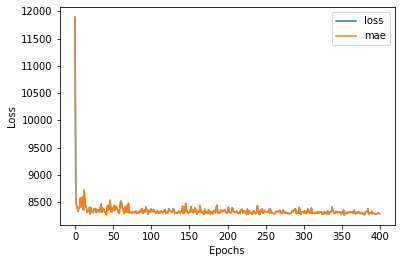

In [24]:
# Let's plot the loss curve VS Epochs: 
pd.DataFrame(model_2_history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")

Seems even increasing the learning rate and the number of epochs the model isn't performing at a greater level

## Import the Boston pricing dataset from TensorFlow using `tf.keras.datasets` and model it.

In [27]:
# Loading the boston datasets from tensorflow datasets: 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz', 
                                                                                  test_split = 0.2, seed = 42)

In [28]:
# Let's check the shape of our data: 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [30]:
# Let's look a sample: 
X_train[0]

array([9.1780e-02, 0.0000e+00, 4.0500e+00, 0.0000e+00, 5.1000e-01,
       6.4160e+00, 8.4100e+01, 2.6463e+00, 5.0000e+00, 2.9600e+02,
       1.6600e+01, 3.9550e+02, 9.0400e+00])

This dataset is a numpy array and it is already normalized

In [33]:
# Let's build a model: 
tf.random.set_seed(42)

# 1.Create a model: 
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(200), 
          tf.keras.layers.Dense(150), 
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(50),
          tf.keras.layers.Dense(1)                     
])

# 2.Compile the model: 
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["mae"])

# 3.Fit the model: 
model_3_history = model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 200)

Epoch 1/200
13/13 [==============================] - 1s 7ms/step - loss: 28.8061 - mae: 28.8061
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 20.4342 - mae: 20.4342
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 19.1713 - mae: 19.1713
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 18.5080 - mae: 18.5080
Epoch 5/200
13/13 [==============================] - 0s 7ms/step - loss: 17.8605 - mae: 17.8605
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 16.8479 - mae: 16.8479
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 16.8408 - mae: 16.8408
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 15.3072 - mae: 15.3072
Epoch 9/200
13/13 [==============================] - 0s 7ms/step - loss: 11.9647 - mae: 11.9647
Epoch 10/200
13/13 [==============================] - 0s 7ms/step - loss: 11.1040 - mae: 11.1040
Epoch 11/200
13/13 [===================

In [34]:
# Let's evaluate on the test data: 
model_3.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 6.0527 - mae: 6.0527


[6.052682876586914, 6.052682876586914]

Text(0, 0.5, 'Losses')

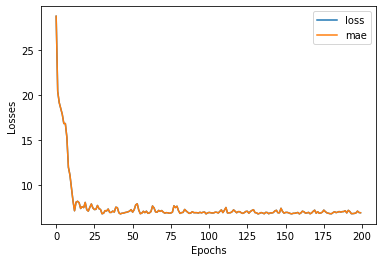

In [35]:
# Plotting the loss vs.Epoch: 
pd.DataFrame(model_3_history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Losses")